In [516]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [517]:
df=pd.read_csv(r"C:\Users\josea\Desktop\IBM Data Science Files\crude_oil_price_data.csv")

In [518]:
df.head()
df.columns

df.rename(columns = {'GASREGW':'Gaso_Price','DCOILWTICO':'Oil_Price','JTSLDL':'Layoffs','UNRATE':'Unemp_rate',
                    'CPIAUCSL':'CPI','UNDCONTSA':'New_houses','TCU':'Cap_util','TOTALSL':'Cons_credit'}, inplace = True) 

df.describe()


df.columns

Index(['date', 'Gaso_Price', 'Oil_Price', 'Layoffs', 'Unemp_rate', 'CPI',
       'HOUST', 'PERMIT', 'New_houses', 'ALTSALES', 'Cap_util', 'Cons_credit',
       'POP', 'US_stock_change'],
      dtype='object')

### Data Distributions

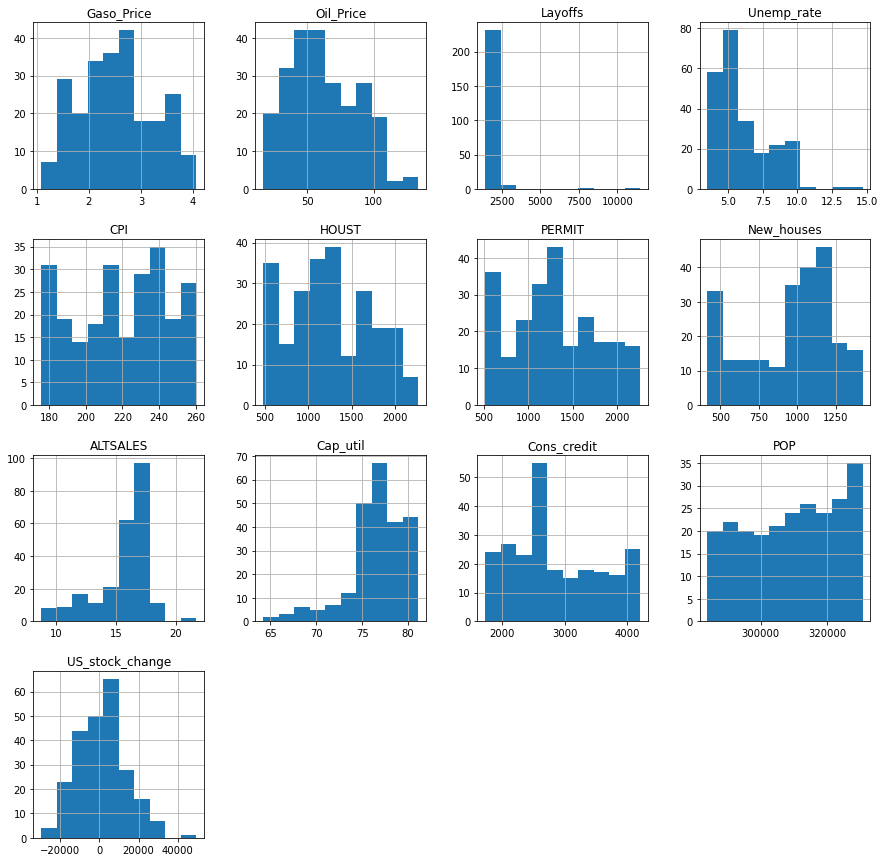

In [519]:
viz = df[['Gaso_Price', 'Oil_Price', 'Layoffs', 'Unemp_rate', 'CPI',
       'HOUST', 'PERMIT', 'New_houses', 'ALTSALES', 'Cap_util', 'Cons_credit',
       'POP','US_stock_change']]
viz.hist(figsize=(15,15))
plt.show()

### Summary Statistics

In [520]:
df.loc[(df.Layoffs > 5000),'Layoffs']=1882
df
df.describe()

,Gaso_Price,Oil_Price,Layoffs,Unemp_rate,CPI,HOUST,PERMIT,New_houses,ALTSALES,Cap_util,Cons_credit,POP,US_stock_change
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,2.537008,62.357269,1904.331933,6.082353,219.339071,1253.718487,1303.016807,949.420168,15.591122,76.627246,2861.092659,309394.317752,1353.756303
std,0.721579,25.821401,174.186606,1.984397,24.932830,466.556006,477.297667,285.911851,2.274640,3.158595,705.304603,13817.593009,12160.613222
min,1.086000,16.550000,1437.000000,3.500000,175.600000,478.000000,513.000000,414.000000,8.718000,64.236600,1729.851680,283920.000000,-29855.000000
25%,2.040750,42.547500,1786.250000,4.700000,199.150000,915.500000,977.000000,719.250000,14.768000,75.294625,2310.063868,297485.000000,-7067.500000
50%,2.549500,59.015000,1881.500000,5.550000,220.031000,1203.500000,1272.000000,1023.500000,16.406000,76.998900,2662.323650,310677.296000,1517.500000
75%,3.011750,83.762500,1985.250000,7.450000,237.810500,1628.000000,1663.500000,1151.000000,17.077250,78.719225,3440.152345,321690.906000,9044.250000
max,4.062000,133.880000,2651.000000,14.700000,260.325000,2273.000000,2263.000000,1424.000000,21.709000,81.126000,4209.625090,330618.501000,49569.000000


### Data Distributions after replacing Layoffs Outlier with median

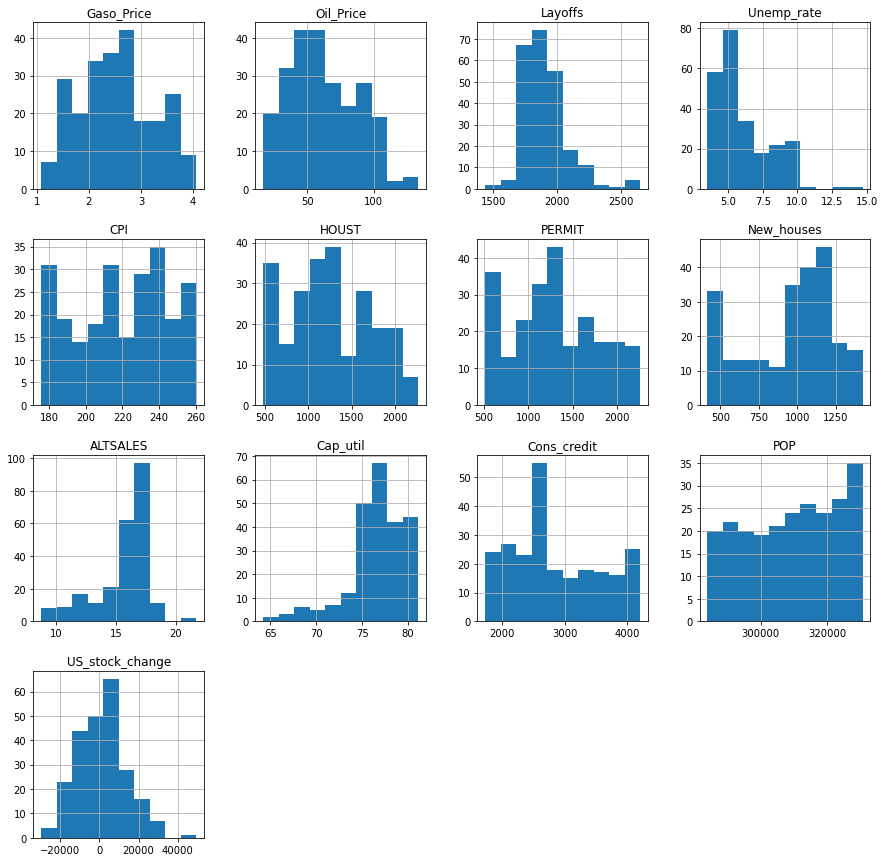

Index(['date', 'Gaso_Price', 'Oil_Price', 'Layoffs', 'Unemp_rate', 'CPI',
       'HOUST', 'PERMIT', 'New_houses', 'ALTSALES', 'Cap_util', 'Cons_credit',
       'POP', 'US_stock_change'],
      dtype='object')

In [521]:
viz = df[['Gaso_Price', 'Oil_Price', 'Layoffs', 'Unemp_rate', 'CPI',
       'HOUST', 'PERMIT', 'New_houses', 'ALTSALES', 'Cap_util', 'Cons_credit',
       'POP','US_stock_change']]
viz.hist(figsize=(15,15))
plt.show()
df.columns

### Correlation Matrix

In [522]:

corrM = round(df.corr(),2)
corrM 

,Gaso_Price,Oil_Price,Layoffs,Unemp_rate,CPI,HOUST,PERMIT,New_houses,ALTSALES,Cap_util,Cons_credit,POP,US_stock_change
Gaso_Price,1.00,0.95,-0.34,0.26,0.51,-0.60,-0.60,-0.52,-0.29,0.24,0.32,0.47,-0.15
Oil_Price,0.95,1.00,-0.23,0.29,0.34,-0.58,-0.58,-0.54,-0.35,0.25,0.14,0.29,-0.14
Layoffs,-0.34,-0.23,1.00,0.13,-0.51,0.01,-0.00,0.01,-0.37,-0.30,-0.50,-0.51,0.16
Unemp_rate,0.26,0.29,0.13,1.00,0.02,-0.59,-0.59,-0.71,-0.78,-0.68,-0.14,0.03,0.06
CPI,0.51,0.34,-0.51,0.02,1.00,-0.51,-0.49,-0.18,-0.04,-0.09,0.97,1.00,-0.08
HOUST,-0.60,-0.58,0.01,-0.59,-0.51,1.00,0.99,0.85,0.67,0.44,-0.33,-0.51,0.03
PERMIT,-0.60,-0.58,-0.00,-0.59,-0.49,0.99,1.00,0.85,0.68,0.45,-0.31,-0.49,0.03
New_houses,-0.52,-0.54,0.01,-0.71,-0.18,0.85,0.85,1.00,0.61,0.41,0.04,-0.18,0.03
ALTSALES,-0.29,-0.35,-0.37,-0.78,-0.04,0.67,0.68,0.61,1.00,0.60,0.11,-0.03,-0.10
Cap_util,0.24,0.25,-0.30,-0.68,-0.09,0.44,0.45,0.41,0.60,1.00,-0.07,-0.12,-0.08


### Correlation Matrix Heatmap

<AxesSubplot:>

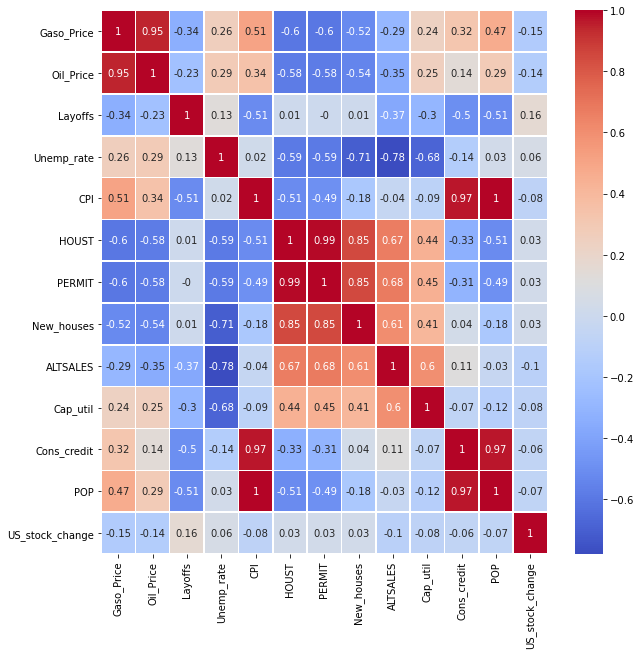

In [523]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sb.heatmap(corrM, annot=True, linewidths=.5, ax=ax, cmap= 'coolwarm')

### Scatter Plot Matrix

array([[<AxesSubplot:xlabel='Gaso_Price', ylabel='Gaso_Price'>,
        <AxesSubplot:xlabel='Oil_Price', ylabel='Gaso_Price'>,
        <AxesSubplot:xlabel='Layoffs', ylabel='Gaso_Price'>,
        <AxesSubplot:xlabel='Unemp_rate', ylabel='Gaso_Price'>,
        <AxesSubplot:xlabel='CPI', ylabel='Gaso_Price'>,
        <AxesSubplot:xlabel='HOUST', ylabel='Gaso_Price'>,
        <AxesSubplot:xlabel='PERMIT', ylabel='Gaso_Price'>,
        <AxesSubplot:xlabel='New_houses', ylabel='Gaso_Price'>,
        <AxesSubplot:xlabel='ALTSALES', ylabel='Gaso_Price'>,
        <AxesSubplot:xlabel='Cap_util', ylabel='Gaso_Price'>,
        <AxesSubplot:xlabel='Cons_credit', ylabel='Gaso_Price'>,
        <AxesSubplot:xlabel='POP', ylabel='Gaso_Price'>,
        <AxesSubplot:xlabel='US_stock_change', ylabel='Gaso_Price'>],
       [<AxesSubplot:xlabel='Gaso_Price', ylabel='Oil_Price'>,
        <AxesSubplot:xlabel='Oil_Price', ylabel='Oil_Price'>,
        <AxesSubplot:xlabel='Layoffs', ylabel='Oil_Price'>,
       

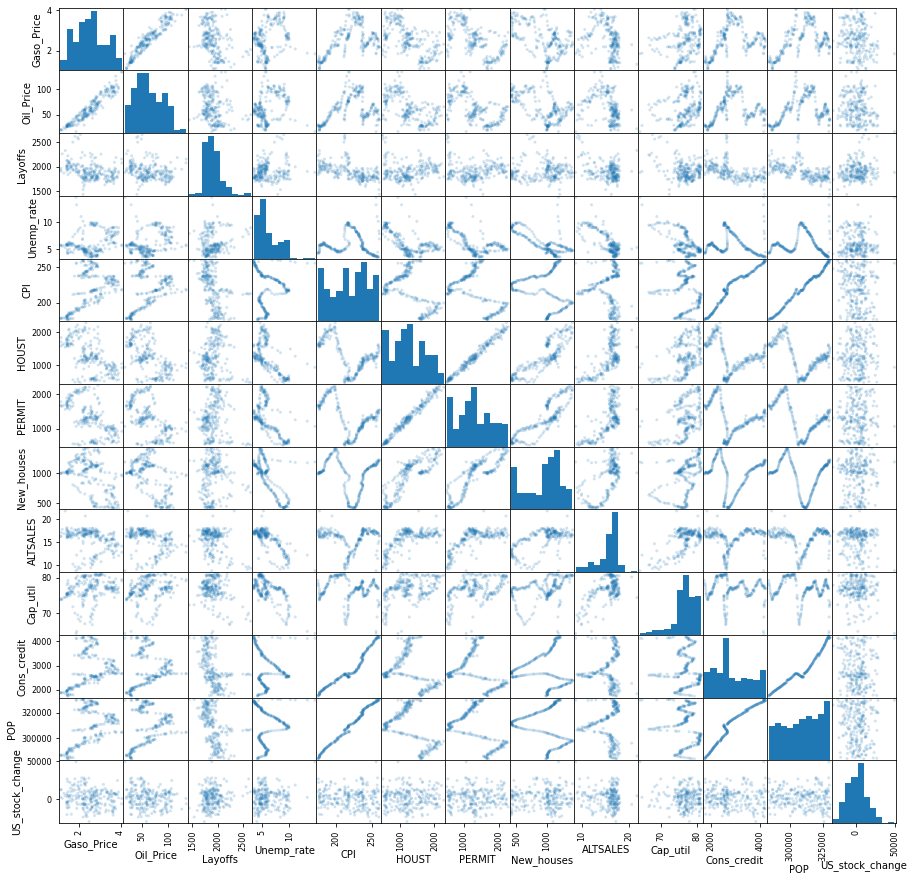

In [524]:
pd.plotting.scatter_matrix(df[['Gaso_Price', 'Oil_Price', 'Layoffs', 'Unemp_rate', 'CPI',
       'HOUST', 'PERMIT', 'New_houses', 'ALTSALES', 'Cap_util', 'Cons_credit',
       'POP','US_stock_change']], alpha=0.2,figsize=(15,15))

In [525]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
print("done")

done


In [526]:
features=['Layoffs', 'Unemp_rate', 'CPI',
       'PERMIT', 'New_houses', 'ALTSALES', 'Cap_util', 'Cons_credit',
       'POP','US_stock_change']
X = df[features]
Y = df['Oil_Price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 72
number of training samples: 166


### Pipeline to build Multiple Linear regression Model

In [530]:
#Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

Input=[('scale',StandardScaler()),('model',LinearRegression())]

features=['Layoffs', 'Unemp_rate', 'CPI',
       'HOUST', 'PERMIT', 'New_houses', 'ALTSALES', 'Cap_util', 'Cons_credit',
       'POP','US_stock_change']

Y=df['Oil_Price']

Pipe=Pipeline(Input)
Pipe

Pipe.fit(x_train,y_train)

yhat1=Pipe.predict(x_train)
yhat1

print("Training Data: ", Pipe.score(x_train,y_train))

yhat2=Pipe.predict(x_test)
yhat2

print("Test data: ", Pipe.score(x_test,y_test))

Training Data:  0.9119132808094936
Test data:  0.8551415280842622


<AxesSubplot:xlabel='Predicted Price', ylabel='Oil_Price'>

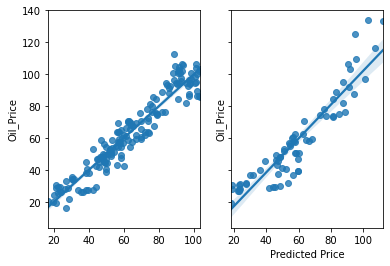

In [531]:
# call regplot on each axes
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
# Set x-axis label
plt.xlabel('Predicted Price')
# Set y-axis label
plt.ylabel('Actual Price')
sb.regplot(x=yhat1, y=y_train, ax=ax1)
sb.regplot(x=yhat2, y=y_test, ax=ax2)


### Kmeans Cluster Analysis

In [532]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

from sklearn.cluster import KMeans 
clusterNum = 7
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(feature_mtx)
labels = k_means.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0]


In [533]:
df["Clus_km"] = labels
df.groupby('Clus_km').mean()

,Gaso_Price,Oil_Price,Layoffs,Unemp_rate,CPI,HOUST,PERMIT,New_houses,ALTSALES,Cap_util,Cons_credit,POP,US_stock_change
Clus_km,,,,,,,,,,,,,
0,2.430844,51.289375,1793.078125,4.785937,248.356687,1246.750000,1308.546875,1092.109375,16.895359,76.265117,3820.605788,325965.801422,-920.171875
1,1.438676,27.497647,2022.323529,5.491176,180.011765,1701.235294,1746.764706,1029.882353,16.845382,75.619103,1910.136196,287758.941176,2921.470588
2,3.296030,88.233333,1774.030303,6.696970,234.557939,967.030303,1025.545455,703.696970,16.011939,77.706252,3119.809185,317512.759182,3301.969697
3,2.991478,85.366957,1969.608696,4.852174,209.467739,1252.304348,1281.652174,1107.478261,15.507826,80.350713,2561.259773,302481.304348,-530.869565
4,2.183914,52.878571,1941.485714,5.171429,194.065714,1984.057143,2054.228571,1309.000000,16.828629,79.405786,2238.727743,295564.200000,2723.314286
5,2.385353,60.914118,2262.294118,8.988235,217.123588,611.235294,633.117647,718.117647,10.429294,69.489353,2699.433832,308284.351412,5358.764706
6,3.273687,89.442500,1858.125000,9.006250,223.309375,631.343750,656.218750,447.937500,12.664594,75.386669,2667.753988,311551.884594,-44.218750


### Hierarchical Agglomerative Clustering

In [534]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [535]:
featureset = df[['Layoffs', 'Unemp_rate', 'CPI',
       'HOUST', 'PERMIT', 'New_houses', 'ALTSALES', 'Cap_util', 'Cons_credit',
       'POP','US_stock_change']]

In [536]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.64497529, 0.0625    , 0.        , 0.62506964, 0.67771429,
        0.56633663, 0.65683935, 0.88590477, 0.        , 0.        ,
        0.49949637],
       [0.33031301, 0.0625    , 0.00472116, 0.63899721, 0.65314286,
        0.56732673, 0.67084905, 0.84133835, 0.00760164, 0.00464683,
        0.22659398],
       [0.5675453 , 0.07142857, 0.00590145, 0.61949861, 0.65485714,
        0.58118812, 0.6273574 , 0.81629306, 0.0123762 , 0.009208  ,
        0.71193846],
       [0.36490939, 0.08035714, 0.00944231, 0.65236769, 0.65885714,
        0.58712871, 0.60141637, 0.7892998 , 0.01743976, 0.01415463,
        0.65405923],
       [0.49752883, 0.07142857, 0.02006492, 0.62785515, 0.65828571,
        0.5950495 , 0.59926103, 0.74845761, 0.02069777, 0.01905843,
        0.35961422]])

In [537]:
agglom = AgglomerativeClustering(n_clusters = 7, linkage = 'complete')
agglom.fit(feature_mtx)
print(agglom.labels_)
df['cluster_'] = agglom.labels_

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 6 6 4 4 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 5 3 3 3 5 5 5 5]


In [538]:
agg_data = df.groupby(['cluster_'])['Gaso_Price','Oil_Price','Layoffs', 'Unemp_rate', 'CPI',
       'HOUST', 'PERMIT', 'New_houses', 'ALTSALES', 'Cap_util', 'Cons_credit','POP',
       'US_stock_change'].mean()
agg_data


<ipython-input-538-dfa35669d38f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_data = df.groupby(['cluster_'])['Gaso_Price','Oil_Price','Layoffs', 'Unemp_rate', 'CPI',


,Gaso_Price,Oil_Price,Layoffs,Unemp_rate,CPI,HOUST,PERMIT,New_houses,ALTSALES,Cap_util,Cons_credit,POP,US_stock_change
cluster_,,,,,,,,,,,,,
0,1.960289,45.080843,1974.265060,5.197590,190.317892,1771.795181,1826.265060,1172.265060,16.724301,78.060005,2149.345389,293353.867470,2022.807229
1,3.453658,98.261053,1834.736842,6.502632,229.285947,965.157895,1005.368421,761.684211,15.453132,78.104361,2968.325698,313705.212053,543.368421
2,2.473661,53.445968,1800.645161,4.387097,246.216952,1217.403226,1282.112903,1058.919355,17.204581,77.005447,3743.253807,325010.601774,762.129032
3,1.931000,27.806667,1926.666667,13.033333,256.294667,1079.000000,1180.000000,1184.333333,11.281000,65.973400,4129.146440,329827.883000,23509.333333
4,2.429950,65.123000,2217.950000,9.015000,215.162400,578.650000,601.950000,624.400000,10.566100,70.228785,2587.551900,307609.391700,3593.800000
5,2.188000,38.258000,1655.400000,7.560000,259.378200,1418.800000,1480.800000,1213.600000,14.733000,72.598560,4161.854684,330209.660200,-5514.200000
6,3.376519,91.651111,1836.703704,8.885185,224.406444,639.518519,661.481481,442.888889,12.956926,75.944893,2693.278599,311974.128630,-1053.037037


### Exclude unemployment rate observations exceeding 10% to improve plot visibility in range of interest

In [539]:

df['cluster_'] = agglom.labels_
df.head()
df['Oil_Price']=df['Oil_Price'].map(int)


df1=df[df["Unemp_rate"]<10]

### Hierachical Cluster Analysis - House Permits vs. Unemployment Rate by Cluster

Text(0, 0.5, 'House Permits')

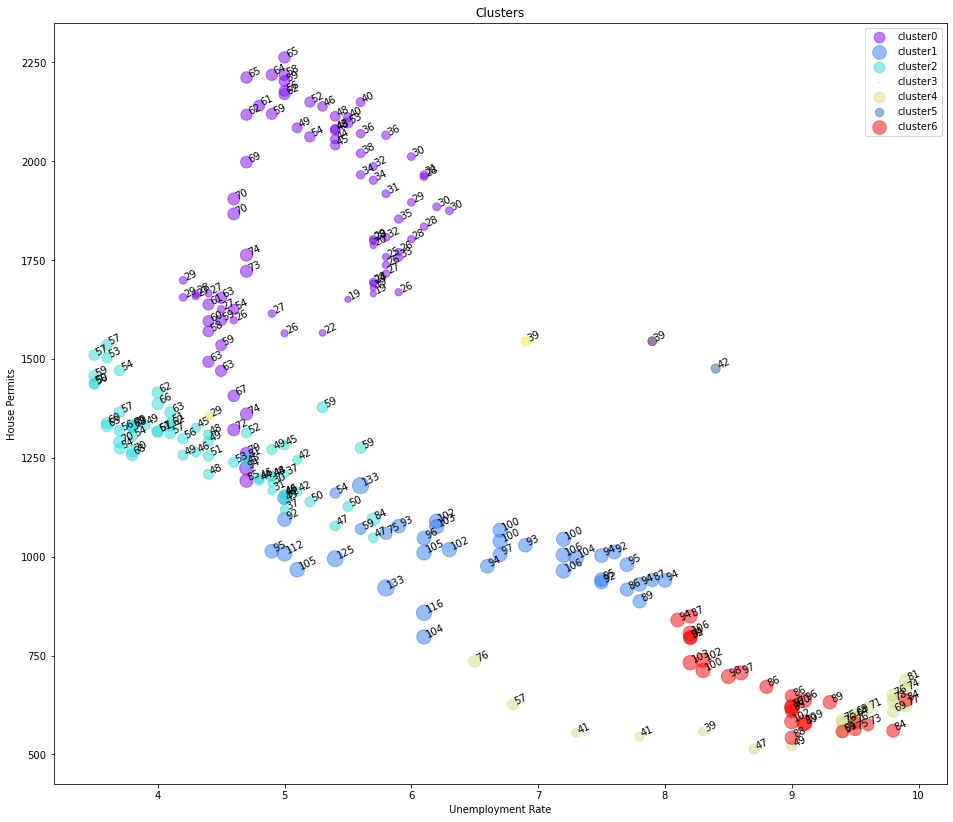

In [506]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df1[df1.cluster_ == label]
    for i in subset.index:
            plt.text(subset.Unemp_rate[i], subset.PERMIT[i],str(subset['Oil_Price'][i]), rotation=25) 
    plt.scatter(subset.Unemp_rate, subset.PERMIT, s= subset.Oil_Price*2, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('Unemployment Rate')
plt.ylabel('House Permits')